# Data cleaning Project1-Part2 Data transformation and scaling: Dati Luca and Miori Gloria

## 1) Load packages and data

In [491]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("churn_data_cleaned.csv", sep=",", index_col=0)
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
4,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


## 2) Data transformation/encoding 

## Categorical columns to be transformed

- `geography` --> One Hote encoding
- `gender` --> Label encoding
- `numofproducts` --> Recoding: make it an ordered categorical since a continous value would not make sense for this feature (you cannot have half of a product)

## ??????????? Not sure If we have to encode the followings. I´m waiting for Polly´s answer 

- `hascrcard`
- `isactivemember`
- `exited`
## 
`age`* could be treated as numerical or categorized inside age groups. In this case we decided to keep and use it as numerical

## Geography Column

In [492]:
df.geography.value_counts()

France     4996
Germany    2406
Spain      2388
Name: geography, dtype: int64

In [493]:
df.geography.nunique()

3

Geography has 3 possible values: France, Germany or Spain.
We decided to encode this feature with One Hot Encoding.

In [494]:
encoded_geo = pd.get_dummies(df.geography, sparse = False) # One hot encoding with get_dummies
encoded_geo.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


Note: removing one column is not trivial (drop_first = True). It can affect the model results, depending as well on the model type we will use.<br>
Dropping the column can have beneficial effects because we get rid of redundant features, but can lead to different results from the model (always depending on the model type itself).<br>
As well, you can use different encoding i.e. dropping or not dropping the first column and evalute the different performances of your model.<br>
For the scope of this project we decided not to remove the first column, but we are aware that it is a point to take into consideration should we have to create a model and evaluate the performances.<br>

In [495]:
df = df.join(encoded_geo)
df.head(5)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,France,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
4,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,0,0,1


In [496]:
df = df.drop('geography', axis = 1) # we can now drop the geography column

## Gender Column

In [497]:
df.gender.value_counts()

Male      5337
Female    4453
Name: gender, dtype: int64

In [498]:
encoder = LabelEncoder()
encoded_gender = encoder.fit_transform(df.gender)
print(encoded_gender)

[0 0 0 ... 0 1 0]


In [499]:
df.gender = encoded_gender
df.head(5)

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
4,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1


## Number of products Column

Number of products should be converted in a Categorical ordered type, since it is not possible to have half of a product for example

In [500]:
df.numofproducts = df.numofproducts.astype(pd.CategoricalDtype(ordered=True))
df.numofproducts

0       1
1       1
2       3
3       1
4       2
       ..
9785    2
9786    1
9787    1
9788    2
9789    1
Name: numofproducts, Length: 9790, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [501]:
df.head()

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
4,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1


## Has credit card Column

In [502]:
df.hascrcard.nunique()

2

In [503]:
encoded_crcard = pd.get_dummies(df.hascrcard, drop_first = True, sparse = False) # One hot encoding with get_dummies, in this case we drop the first column since keeping it would mean adding a redundant feature in the DF
df.hascrcard = encoded_crcard

## Is active member Column

In [504]:
df.isactivemember.nunique()

2

In [505]:
encoded_actmem = pd.get_dummies(df.isactivemember, drop_first = True, sparse = False) # One hot encoding with get_dummies, in this case we drop the first column since keeping it would mean adding a redundant feature in the DF
df.isactivemember = encoded_actmem

## Exited Column

In [507]:
encoded_exited = pd.get_dummies(df.exited, drop_first = True, sparse = False) # One hot encoding with get_dummies, in this case we drop the first column since keeping it would mean adding a redundant feature in the DF
df.exited = encoded_exited

In [508]:
df.head()

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
4,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1


In [509]:
df.to_csv('churn_data_transformed.csv')

## 3) Data scaling

In [510]:
# imported the needed packages

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

<AxesSubplot:>

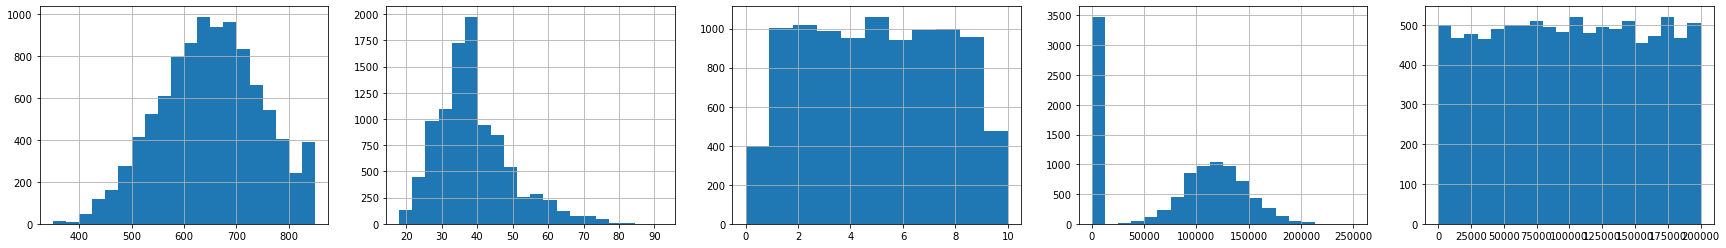

In [511]:
# having a look at the distribution of all non-categorical variables
plt.rcParams["figure.figsize"] = (30,4)
fig, axes = plt.subplots(nrows=1, ncols=5)

df.creditscore.hist(ax=axes[0], bins = 20)
df.age.hist(ax=axes[1], bins = 20)
df.tenure.hist(ax=axes[2], bins = 11)
df.balance.hist(ax=axes[3], bins = 20)
df.estimatedsalary.hist(ax=axes[4], bins = 20)

Very different range of values

We decided to scale the DF with the standard scaler.
The choice of the scaler would depend on the model you will use afterwards, since some model can be influenced on how the data are scaled.

In [512]:
# Applying the standard scaler and save it in a new DF
scaler = StandardScaler()
standardized = scaler.fit_transform(df)
df_scaled_standard = pd.DataFrame(standardized, columns=df.columns)
df_scaled_standard

,creditscore,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,France,Germany,Spain
0,-0.325432,-1.094768,0.298610,-1.045740,-1.242217,-0.885265,0.646385,0.969415,0.020169,1.976059,0.979575,-0.570824,-0.567993
1,-0.439454,-1.094768,0.202116,-1.392902,0.112442,-0.885265,-1.547066,0.969415,0.214662,-0.506058,-1.020851,-0.570824,1.760587
2,-1.538207,-1.094768,0.298610,1.037230,1.338518,2.564873,0.646385,-1.031550,0.238796,1.976059,0.979575,-0.570824,-0.567993
3,2.069021,-1.094768,0.395104,-1.045740,0.786523,-0.885265,0.646385,0.969415,-0.366688,-0.506058,-1.020851,-0.570824,1.760587
4,-0.055927,0.913435,0.491598,1.037230,0.596516,0.839804,0.646385,-1.031550,0.861268,1.976059,-1.020851,-0.570824,1.760587
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,1.250139,0.913435,0.009127,-0.004255,-1.242217,0.839804,0.646385,-1.031550,-0.068067,-0.506058,0.979575,-0.570824,-0.567993
9786,-1.393089,0.913435,-0.376850,1.731553,-0.314902,-0.885265,0.646385,0.969415,0.026265,-0.506058,0.979575,-0.570824,-0.567993
9787,0.607472,-1.094768,-0.280356,0.690068,-1.242217,-0.885265,-1.547066,0.969415,-1.009547,1.976059,0.979575,-0.570824,-0.567993
9788,1.260504,0.913435,0.298610,-0.698579,-0.028710,0.839804,0.646385,-1.031550,-0.126833,1.976059,-1.020851,1.751854,-0.567993


<AxesSubplot:>

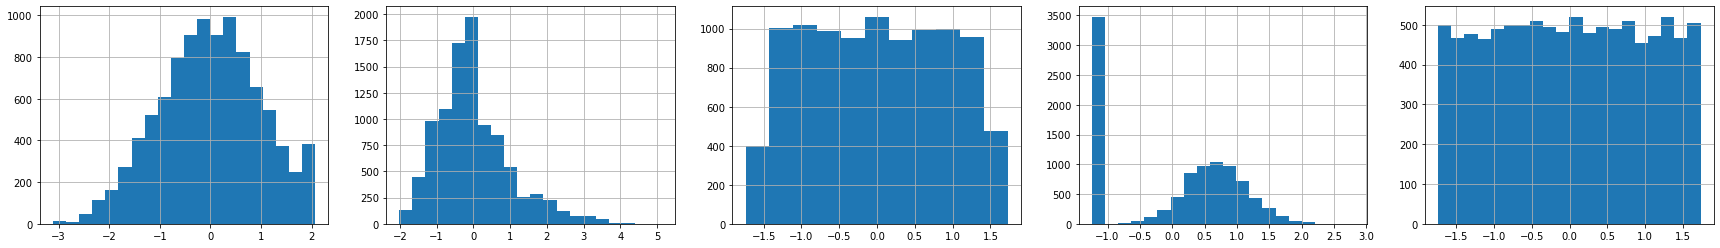

In [513]:
# having a look at the distribution of all non-categorical variables after scaling with the standard scaler
plt.rcParams["figure.figsize"] = (30,4)
fig, axes = plt.subplots(nrows=1, ncols=5)

df_scaled_standard.creditscore.hist(ax=axes[0], bins = 20)
df_scaled_standard.age.hist(ax=axes[1], bins = 20)
df_scaled_standard.tenure.hist(ax=axes[2], bins = 11)
df_scaled_standard.balance.hist(ax=axes[3], bins = 20)
df_scaled_standard.estimatedsalary.hist(ax=axes[4], bins  = 20)

In [514]:
# saving the scaled data
df_scaled_standard.to_csv('churn_data_scaled_standard.csv')